Import Libraries

In [6]:
!pip install pandas numpy nltk scikit-learn matplotlib seaborn


Load and Explore Dataset

In [9]:
from IPython.display import display
from ipywidgets import FileUpload
import pandas as pd
import io

# Create upload widget
upload = FileUpload(accept='.csv', multiple=False)
display(upload)

# After file is uploaded, run this to read it
def load_uploaded_file(upload_widget):
    if upload_widget.value:
        name = list(upload_widget.value.keys())[0]
        content = upload_widget.value[name]['content']
        df = pd.read_csv(io.BytesIO(content))
        print("File loaded successfully!")
        return df
    else:
        print("Please upload a file first.")

# Run this after uploading
# df = load_uploaded_file(upload)


FileUpload(value={}, accept='.csv', description='Upload')

In [10]:
df = load_uploaded_file(upload)

File loaded successfully!


Text Cleaning & Preprocessing

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#", "", text)  # Remove URLs and mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)           # Remove non-letter characters
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply cleaning function
df['clean_text'] = df['text'].apply(clean_text)

# Preview cleaned data
print(df[['text', 'clean_text']].head())


                                                text  \
0  I love this product! It works great and I'm ve...   
1  This is the worst experience I've ever had. Co...   
2   Not bad, but could be better. It's okay overall.   
3  Absolutely fantastic! Highly recommend it to e...   
4              Terrible service. Will not buy again.   

                                          clean_text  
0              love product works great im satisfied  
1  worst experience ive ever completely disappointed  
2                      bad could better okay overall  
3     absolutely fantastic highly recommend everyone  
4                               terrible service buy  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Train/Test Split

In [12]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text Vectorization (TF-IDF)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Model Training (Logistic Regression)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

Model Evaluation

In [15]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Visualization (Optional but Useful)

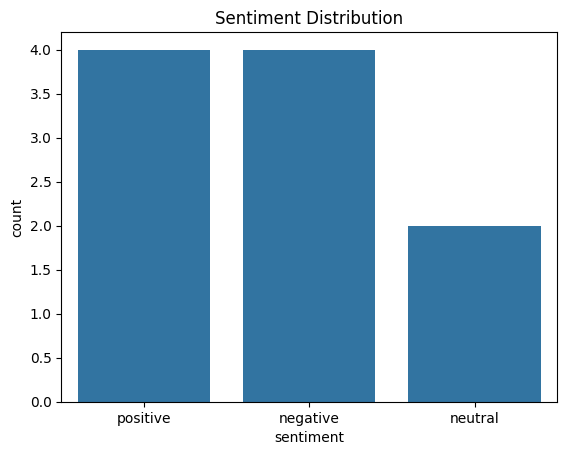

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()
